# Machine Learning Project

>This Project is about building a Machine learning model that can identify whether a customer is eligible for loan or not
Going through the different stages of machine learning framework,using the foundation of the concepts from Data analysis process workflow up to machine learning models developments

## Workflow
>Import libraries\
>Load the dataset\
>Data Exploration\
>Data Preprocessing\
>Select the best features in the dataset\
>Split data set into training and testing\
>Normalization\
>Fit the model\
>Evaluate the model\
>Fine tunning\
>Predict the test data set

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
#Load Dataset
df = pd.read_csv("loan_data_set.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


>From the Dataset(614 rows and 13 columns)
>>Loan_ID -> Unique Loan ID for each applicants\
>>Gender -> Male or Female\
>>Married -> Marriage status(Yes/No)\
>>Dependents -> Number of Dependents the applicants caters for\
>>Education -> Applicant's Education (Graduate/NotGraduate)\
>>Self_Employed -> Self employment(Yes/No)\
>>ApplicantIncome -> Applicant's income\
>>CoapplicantIncome -> Coapplicant's income\
>>LoanAmount -> Loan amount\
>>Loan_Amount_Term ->Term of a loan\
>>Credit_History -> Credit history of Applicant\
>>Property_Area -> Urban/ Semi-Urban/Rural\
>>Loan_Status ->  Loan approved (Y/N)\

>This is a supervised classification machine learning problem which the target variable of the dataset is loan_status which can take the values 'Y' or 'N'. \
The machine learning model will predict whether a customer is eligible for a loan or not based on their profile information such as Gender,Relationship Status, Dependents, Education, Self Employment, Applicant's Income, Coapplicant's Income,Loan Amount, Term of loan, and PropertyArea.


## Data Cleaning

In [3]:
#Rename the columns to lowercase with underscores instead of spaces
df = df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
df = df.rename(columns={"applicantincome" : "applicant_income", "coapplicantincome" : "coapplicant_income", "loanamount" : "loan_amount"})
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')

In [4]:
# Check for missing values
df.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [5]:
#Work on missing values  median is a better choice because it is less sensitive to outliers.
def replace_null_values(col): 
    if col.dtype == np.dtype(int):
        return col.fillna(col.median())
    elif col.dtype == np.dtype(float):
        return col.fillna(col.median())
    elif col.dtype == np.dtype("O"):
        return col.fillna(col.mode()[0])
    else:
        return col
for col in df.columns:
    df[col] = replace_null_values(df[col])

In [6]:
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [7]:
#No Duplicates in this Dataframe

In [8]:
df = df.astype({'applicant_income':'int64'})
df = df.astype({'coapplicant_income':'int64'})
df = df.astype({'loan_amount':'int64'})
df = df.astype({'loan_amount_term':'int64'})
df = df.astype({'credit_history':'int64'})

In [9]:
#Save clean data frame
cleaned_df=df
cleaned_df.to_csv("loan_data.csv", index=False)

loan_df= pd.read_csv("loan_data.csv")
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


## Exploratory Data Analysis

In [10]:
#Get basic information about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   loan_id             614 non-null    object
 1   gender              614 non-null    object
 2   married             614 non-null    object
 3   dependents          614 non-null    object
 4   education           614 non-null    object
 5   self_employed       614 non-null    object
 6   applicant_income    614 non-null    int64 
 7   coapplicant_income  614 non-null    int64 
 8   loan_amount         614 non-null    int64 
 9   loan_amount_term    614 non-null    int64 
 10  credit_history      614 non-null    int64 
 11  property_area       614 non-null    object
 12  loan_status         614 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.5+ KB


In [11]:
loan_df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,145.752443,342.410423,0.855049
std,6109.041673,2926.24876,84.107233,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,128.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


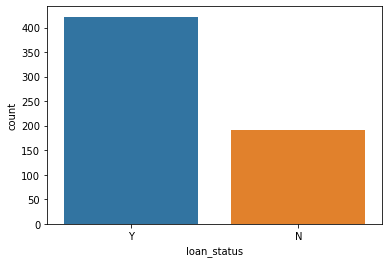

In [16]:
# Visualize the data using seaborn
sns.countplot(loan_df['loan_status']);


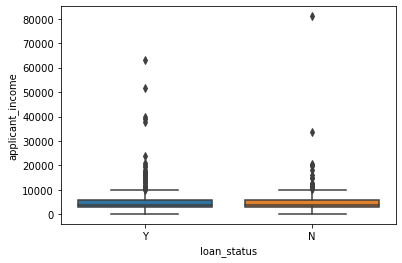

In [17]:
sns.boxplot(x='loan_status', y='applicant_income', data=loan_df);


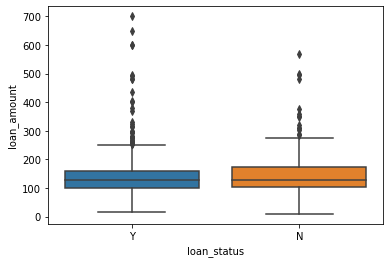

In [18]:
sns.boxplot(x='loan_status', y='loan_amount', data=loan_df);

In [19]:
loan_df['loan_status'] = loan_df['loan_status'].map({'Y': 1, 'N': 0})
loan_df.corr()["loan_status"].sort_values(ascending= False)

loan_status           1.000000
credit_history        0.540556
applicant_income     -0.004710
loan_amount_term     -0.022549
loan_amount          -0.033214
coapplicant_income   -0.059188
Name: loan_status, dtype: float64

>The credit_history column has a positive correlation with the target variable, it can be a feature that will determine loan eligibility


<AxesSubplot:>

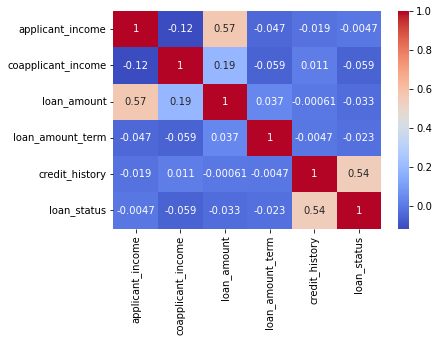

In [20]:
sns.heatmap(loan_df.corr(), annot=True, cmap='coolwarm')

In [21]:
df_num = loan_df.select_dtypes("number").columns
df_num

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'loan_status'],
      dtype='object')

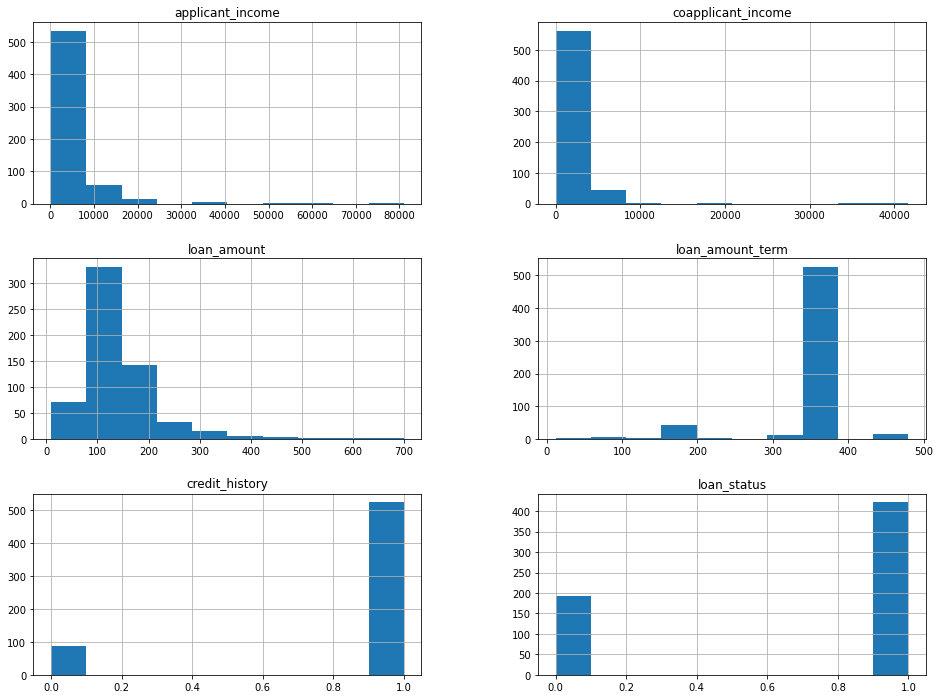

In [22]:
loan_df[df_num].hist(figsize=(16, 12));

In [23]:
loan_df[df_num].skew().sort_values(ascending= False)

coapplicant_income    7.491530
applicant_income      6.539513
loan_amount           2.743053
loan_status          -0.809998
credit_history       -2.021971
loan_amount_term     -2.402112
dtype: float64

>The "coapplicant_income" and "applicant_income" columns have the highest skewed values


In [24]:
skewed_cols = ["coapplicant_income", "applicant_income"]

In [25]:
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,1


## Data Preprocessing

In [26]:
def check_outliers():
        outliers_cols = []
    
        for col in loan_df.select_dtypes("number"): 
            q1 = loan_df[col].quantile(.25)
            q3 = loan_df[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (loan_df[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (loan_df[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [27]:
#putting the function into a variable
outlier_columns = check_outliers()

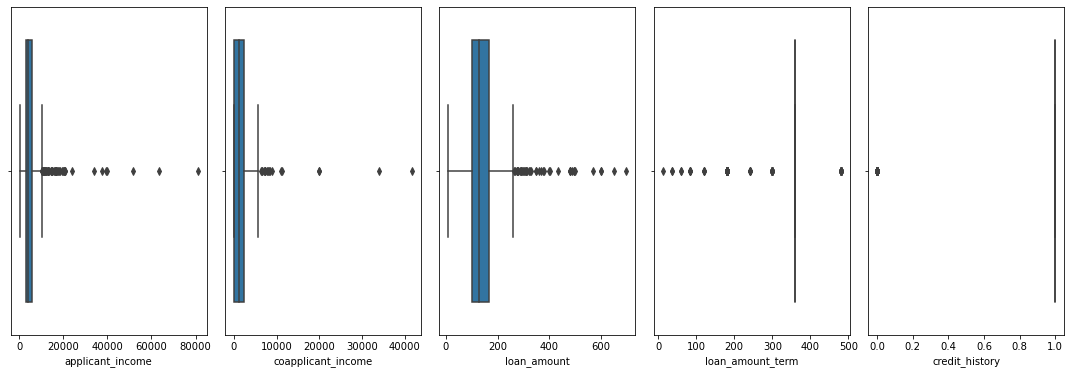

In [28]:
#Visualizing the boxplot for the columns with outliers
plt.figure(figsize=(15,10))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(x=loan_df[col])
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
#Transform the skewed columns
loan_df[skewed_cols] = loan_df[skewed_cols].apply(lambda x: np.log(x + 1))

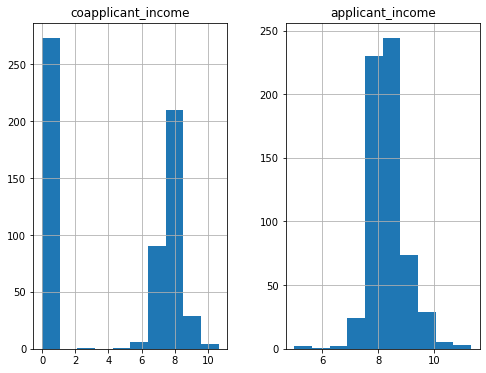

In [31]:
loan_df[skewed_cols].hist(figsize=(8, 6));#Columns distributed more evenly

In [32]:
#Scaling the columns with outliers
loan_df[outlier_columns] = scaler.fit_transform(loan_df[outlier_columns])
loan_df[outlier_columns]

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
0,0.516186,-1.107779,-0.211241,0.273231,0.411733
1,0.137806,0.782160,-0.211241,0.273231,0.411733
2,-0.519479,-1.107779,-0.948996,0.273231,0.411733
3,-0.751605,0.897529,-0.306435,0.273231,0.411733
4,0.555727,-1.107779,-0.056551,0.273231,0.411733
...,...,...,...,...,...
609,-0.572062,-1.107779,-0.889500,0.273231,0.411733
610,-0.032679,-1.107779,-1.258378,-2.522836,0.411733
611,1.015921,0.308486,1.276168,0.273231,0.411733
612,0.918972,-1.107779,0.490816,0.273231,0.411733


In [33]:
loan_df= loan_df.drop("loan_id", axis=1)
#Identify categorical columns
cat_columns = loan_df.select_dtypes(include=['object']).columns.tolist()

#Convert categorical columns to numeric values using LabelEncoder
le = LabelEncoder()
for col in cat_columns:
    loan_df[col] = le.fit_transform(loan_df[col])

In [34]:
loan_df.head()

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,0.516186,-1.107779,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,0.137806,0.782160,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.519479,-1.107779,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.751605,0.897529,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.555727,-1.107779,-0.056551,0.273231,0.411733,2,1


## Feature Selection


In [35]:
X = loan_df.drop('loan_status', axis=1)
y = loan_df['loan_status']
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)     

## Model selection and training
>Select the appropriate machine learning model(s) for the given problem, train the model on the training set, and evaluate its performance on the testing set. 

In [36]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


## Model Evaluation
>Evaluate the performance of the model using various metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix. 

In [37]:
#Evaluation metrics
print('Accuracy Score (Logistic Regression):', accuracy_score(y_test, lr_pred))
print('Accuracy Score (Decision Tree):', accuracy_score(y_test, dt_pred))
print('Accuracy Score (Random Forest):', accuracy_score(y_test, rf_pred))

print('Precision Score (Logistic Regression):', precision_score(y_test, lr_pred))
print('Precision Score (Decision Tree):', precision_score(y_test, dt_pred))
print('Precision Score (Random Forest):', precision_score(y_test, rf_pred))

print('Recall Score (Logistic Regression):', recall_score(y_test, lr_pred))
print('Recall Score (Decision Tree):', recall_score(y_test, dt_pred))
print('Recall Score (Random Forest):', recall_score(y_test, rf_pred))

print('F1 Score (Logistic Regression):', f1_score(y_test, lr_pred))
print('F1 Score (Decision Tree):', f1_score(y_test, dt_pred))
print('F1 Score (Random Forest):', f1_score(y_test, rf_pred))

print('ROC-AUC Score (Logistic Regression):', roc_auc_score(y_test, lr_pred))
print('ROC-AUC Score (Decision Tree):', roc_auc_score(y_test, dt_pred))
print('ROC-AUC Score (Random Forest):', roc_auc_score(y_test, rf_pred))

print('Confusion Matrix (Logistic Regression):\n', confusion_matrix(y_test, lr_pred))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, dt_pred))
print('Confusion Matrix (Random Forest):\n', confusion_matrix(y_test, rf_pred))

Accuracy Score (Logistic Regression): 0.7886178861788617
Accuracy Score (Decision Tree): 0.7154471544715447
Accuracy Score (Random Forest): 0.7804878048780488
Precision Score (Logistic Regression): 0.7596153846153846
Precision Score (Decision Tree): 0.7777777777777778
Precision Score (Random Forest): 0.7572815533980582
Recall Score (Logistic Regression): 0.9875
Recall Score (Decision Tree): 0.7875
Recall Score (Random Forest): 0.975
F1 Score (Logistic Regression): 0.8586956521739131
F1 Score (Decision Tree): 0.782608695652174
F1 Score (Random Forest): 0.8524590163934427
ROC-AUC Score (Logistic Regression): 0.7030523255813954
ROC-AUC Score (Decision Tree): 0.6844476744186047
ROC-AUC Score (Random Forest): 0.6968023255813953
Confusion Matrix (Logistic Regression):
 [[18 25]
 [ 1 79]]
Confusion Matrix (Decision Tree):
 [[25 18]
 [17 63]]
Confusion Matrix (Random Forest):
 [[18 25]
 [ 2 78]]


>Based on the accuracy, precision, recall, F1, and ROC-AUC scores, the Logistic Regression and Random Forest models are performing better than the Decision Tree model.\

>In terms of accuracy, the Logistic Regression model has a score of 0.7886, while the Random Forest model has a score of 0.7805. However, the Logistic Regression model has a higher precision score (0.7596) compared to the Random Forest model (0.7573). On the other hand, the Random Forest model has a higher recall score (0.975) compared to the Logistic Regression model (0.9875)\

>Based on the evaluation metrics, the logistic regression model appears to be the best choice for the loan eligibility prediction model. It has the highest accuracy score, precision score, F1 score, and ROC-AUC score among the three models. The confusion matrix also shows that the model has a relatively low number of false positives and false negatives, indicating that it is performing well in both predicting loan approvals and rejections.

## Model Tuning
>Tune the hyperparameters of the model to improve its performance.

In [42]:
#Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}
clf = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8145949288806431


## Final Model Selection and Training
>Select the final model based on its performance on the testing set and train it on the entire dataset.

In [44]:
#Create grid search object
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    cv=5, verbose=0)

#Fit the grid search object to the training data
grid.fit(X_train, y_train)

#Make predictions on the testing data using the best estimator from grid search
y_pred = grid.best_estimator_.predict(X_test)

#Evaluate the accuracy of the final model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.7886178861788617


In [46]:
#Train final model on entire dataset
final_model = grid.best_estimator_
final_model.fit(X, y)


LogisticRegression(C=0.01, solver='liblinear')